# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 700055807

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset 
                 # In the file, attributes are separated by ,

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

import seaborn as sns

In [3]:
dia_all.shape

(768, 9)

### Class feature must be changed to 0 and 1

In [82]:
dia_all.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


## Seperate the input (attributes) from target (label)

In [4]:
# mapping 0 to negative and 1 to positive
dia_all['class'] = dia_all['class'].map({'tested_positive': 1, 'tested_negative':0})

# Explore the data
- Describe
- Correlation
- graph

   ## Taks 1.a mean, median, standard-deviation and correlation matrix
   Below we can see that, there is some correlation between mass and skin, and insu and skin.

In [5]:
#your code here
dia_all.iloc[:,:-1].corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


### Describe method showing features have different scales

In [85]:
dia_all.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


   ## Taks 1.b	Draw one chart that should help with understanding the data

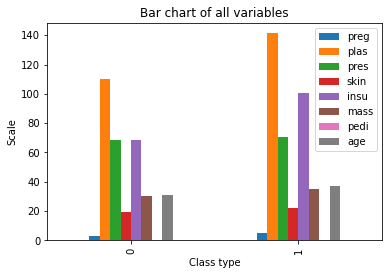

In [6]:
dia_all.groupby('class').mean().plot.bar()
plt.title('Bar chart of all variables')
plt.xlabel('Class type')
plt.ylabel('Scale')
plt.show()


   ## Task 2.a Building DT with 10 different random splits

**Setting the DF into target and source**

In [7]:
# Seperate the df into target and source
dia_all_X = dia_all.drop('class',axis=1)
dia_all_y = dia_all['class']



In [8]:
#DT model with 10 iterations using gini, default

scores = []
TP_rate_list = []
Precision_list = []

#looping through 10 random splits
for x in [110,111, 112,113,114,115,116,117,118,119]:
    X_train, X_test, y_train, y_test =  train_test_split(dia_all_X,
                                                     dia_all_y, test_size=0.3,
                                                    random_state=x)
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    score = accuracy_score(y_test, y_pred)
    scores.append(score)
    
    TP_rate = recall_score(y_test, y_pred)
    TP_rate_list.append(TP_rate)
    
    Precision = precision_score(y_test,y_pred)
    Precision_list.append(Precision)
    

print("Average accuracy Score:{}".format(np.mean(score)))
print("Average TP_rate:{}".format(np.mean(TP_rate_list)))
print("Average Precision:{}".format(np.mean(Precision_list)))


Average accuracy Score:0.6666666666666666
Average TP_rate:0.5758668689655769
Average Precision:0.5497529165747443


In [9]:
#DT model with 10 iterations using Entropy

scores_ent = []
TP_rate_list_ent = []
Precision_list_ent = []

for x in [110,111, 112,113,114,115,116,117,118,119]:
    X_train, X_test, y_train, y_test =  train_test_split(dia_all_X,
                                                     dia_all_y, test_size=0.3,
                                                    random_state=x)
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    score_ent = accuracy_score(y_test, y_pred)
    scores_ent.append(score_ent)
    
    TP_rate_ent = recall_score(y_test, y_pred)
    TP_rate_list_ent.append(TP_rate_ent)
    
    Precision_ent = precision_score(y_test,y_pred)
    Precision_list_ent.append(Precision_ent)
    

print("Average accuracy Score with entropy:{}".format(np.mean(score_ent)))
print("Average TP_rate with entropy:{}".format(np.mean(TP_rate_list_ent)))
print("Average Precision with entropy:{}".format(np.mean(Precision_list_ent)))

Average accuracy Score with entropy:0.7056277056277056
Average TP_rate with entropy:0.5725863068129136
Average Precision with entropy:0.5619523959218623


### The below graph shows the difference between each measurement when using the default gini and entropy

In [10]:
#dict to hold all the average scores to then turn into a table
dict_scores = {'mean_accuracy':np.mean(score),
                'mean_TP_rate' : np.mean(TP_rate_list),
               'mean_precision' :np.mean(Precision_list),
               'mean_accuracy_ent':np.mean(score_ent),
               'mean_TP_ent' : np.mean(TP_rate_list_ent),
               'mean_precision_ent' :np.mean(Precision_list_ent)}

## Task 2.c The below shows that entropy has a slight better performance in accuracy

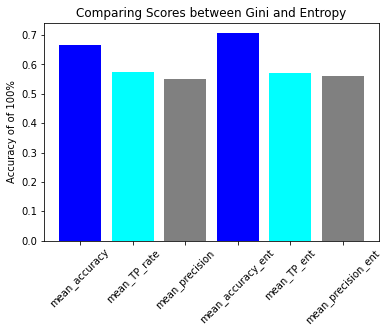

In [14]:
plt.bar(range(len(dict_scores)), list(dict_scores.values()), align='center',
       color=['blue', 'cyan', 'grey', 'blue', 'cyan', 'grey' ])
plt.xticks(range(len(dict_scores)), list(dict_scores.keys()), rotation=45)
plt.ylabel('Accuracy of of 100%')
plt.title('Comparing Scores between Gini and Entropy')
plt.show()

## Task 2.d:

After doing some reading, i have found out that DT do not need any scaling or normilziation, it does not affect the alogrithm. Thats because they are not sensative to the variance.

# Task 3 to run DT with differnt parameters


## Task 3 a. using different min_splits

In [15]:
# running a DT with  n_splits
scores = []
TP_rate_list = []
Precision_list = []

scores_dict = {}
TP_dict = {}
Precision_dict = {}

X_train, X_test, y_train, y_test =  train_test_split(dia_all_X,
                                                     dia_all_y, test_size=0.3,
                                                     random_state=123)
#trying different splits
n_splits = [2,5,10,15]

for s in n_splits:
    model = DecisionTreeClassifier(min_samples_split=s)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    score = accuracy_score(y_test, y_pred)
    scores_dict[s] = score
    scores.append(score)
    
    
    TP_rate = recall_score(y_test, y_pred)
    TP_dict[s] = TP_rate
    TP_rate_list.append(TP_rate)
    
    Precision = precision_score(y_test,y_pred)
    Precision_list.append(Precision)
    Precision_dict[s] = Precision

print(scores_dict)
print(TP_dict)
print(Precision_dict)

{2: 0.7142857142857143, 5: 0.7229437229437229, 10: 0.7056277056277056, 15: 0.7056277056277056}
{2: 0.5909090909090909, 5: 0.6022727272727273, 10: 0.5681818181818182, 15: 0.5681818181818182}
{2: 0.6341463414634146, 5: 0.6463414634146342, 10: 0.625, 15: 0.625}


**TP rate here decreased when increasing splits, but better accuracy and precsion at 5 splits**
Table below:

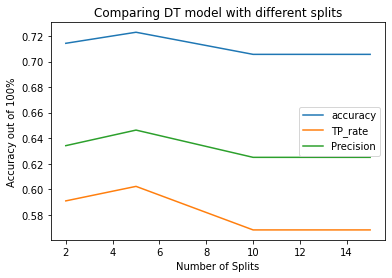

In [16]:
plt.plot(n_splits,list(scores_dict.values()), label='accuracy')
plt.plot(n_splits,list(TP_dict.values()), label='TP_rate')
plt.plot(n_splits, list(Precision_dict.values()), label='Precision')
plt.xlabel('Number of Splits')
plt.ylabel('Accuracy out of 100%')
plt.title('Comparing DT model with different splits')
plt.legend();

## Task 3 b. running a DT with different max depth parameters

In [17]:
# Running a DT with number of max depth

scores = []
TP_rate_list = []
Precision_list = []

scores_dict = {}
TP_dict = {}
Precision_dict = {}

X_train, X_test, y_train, y_test =  train_test_split(dia_all_X,
                                                     dia_all_y, test_size=0.3,
                                                     random_state=123)
#trying different max depths
max_depth = [3,4,5,6]


# looping through max depths
for s in max_depth:
    model = DecisionTreeClassifier(max_depth=s)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    score = accuracy_score(y_test, y_pred)
    scores_dict[s] = score
    scores.append(score)
    
    
    TP_rate = recall_score(y_test, y_pred)
    TP_dict[s] = TP_rate
    TP_rate_list.append(TP_rate)
    
    Precision = precision_score(y_test,y_pred)
    Precision_list.append(Precision)
    Precision_dict[s] = Precision

print(scores_dict)
print(TP_dict)
print(Precision_dict)



{3: 0.7272727272727273, 4: 0.7229437229437229, 5: 0.7359307359307359, 6: 0.7056277056277056}
{3: 0.3409090909090909, 4: 0.6477272727272727, 5: 0.6590909090909091, 6: 0.6363636363636364}
{3: 0.8571428571428571, 4: 0.6333333333333333, 5: 0.651685393258427, 6: 0.6086956521739131}


**Overall accuracy seems constant, but TP_rate has imporved at 4 to 5**
Table below:

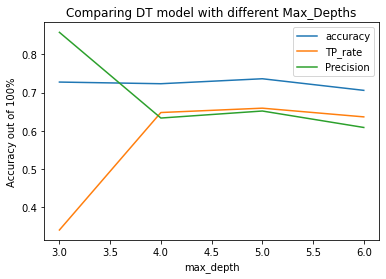

In [18]:
plt.plot(max_depth,list(scores_dict.values()), label='accuracy')
plt.plot(max_depth,list(TP_dict.values()), label='TP_rate')
plt.plot(max_depth, list(Precision_dict.values()), label='Precision')
plt.xlabel('max_depth')
plt.ylabel('Accuracy out of 100%')
plt.title('Comparing DT model with different Max_Depths')
plt.legend();